In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# import and explore data

In [2]:
house_data = pd.read_csv("house_data.csv")
house_data.head(10)

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0
5,1960,67.0,1.0
6,2000,35.0,1.0
7,1900,90.6,1.0
8,2050,60.0,1.0
9,2100,47.0,1.0


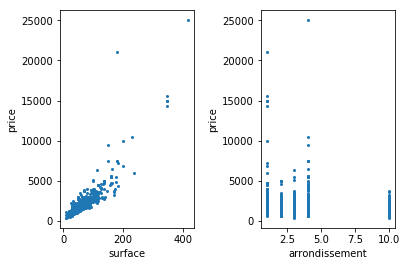

In [3]:
plt.subplot(1,2,1)
plt.plot(house_data["surface"], house_data["price"], "o", markersize=2)
plt.xlabel("surface")
plt.ylabel("price")
plt.subplot(1,2,2)
plt.plot(house_data["arrondissement"], house_data["price"], "o", markersize=2)
plt.xlabel("arrondissement")
plt.ylabel("price")
plt.subplots_adjust(wspace=0.5)
plt.show()

# Drop Nan values

In [4]:
house_data.isna().sum()

price             0
surface           5
arrondissement    5
dtype: int64

In [5]:
house_data.dropna(inplace=True)
house_data.isna().sum()

price             0
surface           0
arrondissement    0
dtype: int64

In [6]:
data = house_data.iloc[:,1:]
target = house_data.iloc[:,0]

In [7]:
data.head()

,surface,arrondissement
0,46.1,1.0
1,41.0,1.0
2,55.0,1.0
3,46.0,1.0
4,49.0,1.0


In [8]:
target.head()

0    1820
1    1750
2    1900
3    1950
4    1950
Name: price, dtype: int64

# Split test and train data

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

C:\Users\mhaouech\AppData\Local\Continuum\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Model

In [10]:
reg = linear_model.LinearRegression()

In [11]:
reg.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
reg.score(xtest, ytest)

0.6923516589173708

# Exhaustive search over specified parameter values: Ridge, Lasso and ElaticNet enhanced by cross validation

## Ridge cross validation

In [13]:
reg_ridge_cv = linear_model.RidgeCV(alphas=np.logspace(-5, 5, 10), cv=10)
reg_ridge_cv.fit(xtrain, ytrain)

RidgeCV(alphas=array([1.00000e-05, 1.29155e-04, 1.66810e-03, 2.15443e-02, 2.78256e-01,
       3.59381e+00, 4.64159e+01, 5.99484e+02, 7.74264e+03, 1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [14]:
reg_ridge_cv.score(xtest, ytest)

0.67881679241183

## Lasso cross validation

In [15]:
reg_lasso_cv = linear_model.LassoCV(alphas=np.logspace(-5, 5, 10), cv=10)
reg_lasso_cv.fit(xtrain, ytrain)

LassoCV(alphas=array([1.00000e-05, 1.29155e-04, 1.66810e-03, 2.15443e-02, 2.78256e-01,
       3.59381e+00, 4.64159e+01, 5.99484e+02, 7.74264e+03, 1.00000e+05]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [16]:
reg_lasso_cv.score(xtest, ytest)

0.6923516588435842

## Elastic Net cross validation

In [17]:
reg_elasticnet_cv = linear_model.ElasticNetCV(alphas=np.logspace(-5, 5, 10), cv=10)
reg_elasticnet_cv.fit(xtrain, ytrain)

ElasticNetCV(alphas=array([1.00000e-05, 1.29155e-04, 1.66810e-03, 2.15443e-02, 2.78256e-01,
       3.59381e+00, 4.64159e+01, 5.99484e+02, 7.74264e+03, 1.00000e+05]),
       copy_X=True, cv=10, eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [18]:
reg_elasticnet_cv.score(xtest, ytest)

0.6923043096292151

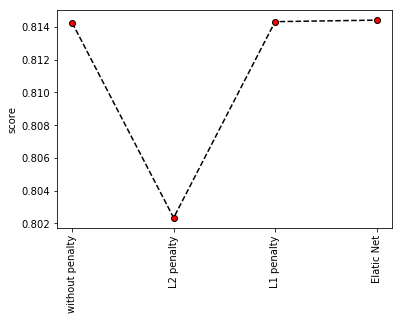

In [19]:
score = [0.8142539950614164, 0.8023434232582367, 0.8143216660419118, 0.8144161844116875]
estimator = ["without penalty", "L2 penalty", "L1 penalty", "Elatic Net"]
plt.plot(estimator, score, "k--o", markerfacecolor="r", markeredgecolor="k", markersize=6)
plt.xticks(rotation='vertical')
plt.ylabel("score")
plt.show()

### Conclusion : Elastic Net is the best algorithme.